In [63]:
from autograd import numpy as np
from autograd import grad
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [64]:
bike_data = pd.read_csv("train.csv")
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None


In [65]:
bike_data = bike_data.drop(["id"],axis=1)
print(bike_data.head())

   hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0    20                  16.3                     1.0                 1.5   
1    13                  20.1                     0.0                 1.4   
2     6                  13.9                     0.0                 0.7   
3    23                   8.1                     0.0                 2.7   
4    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0   49.0  
1            40.0  159.0  

<AxesSubplot:>

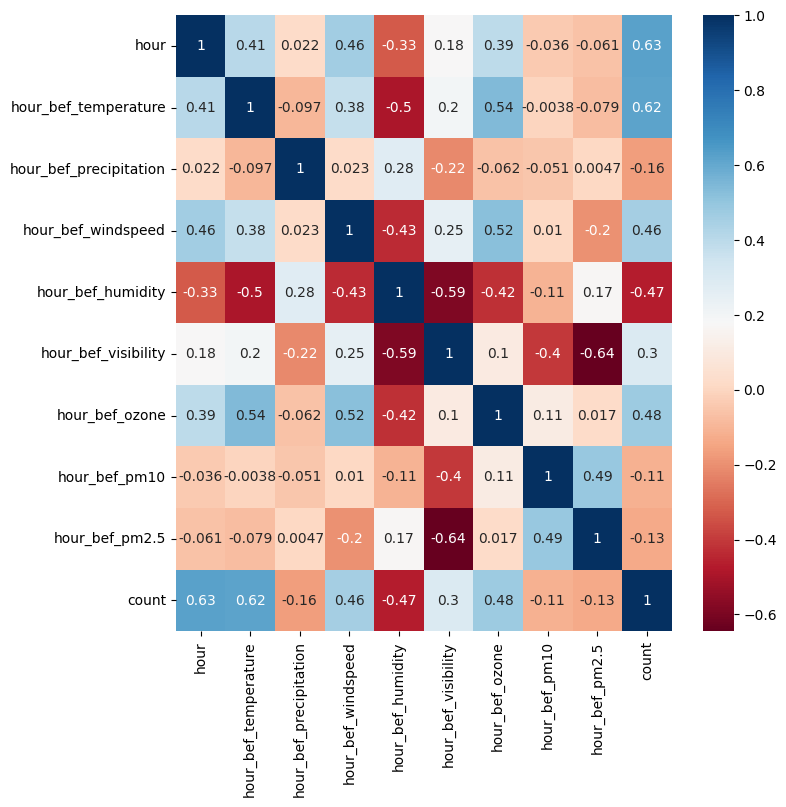

In [66]:
plt.figure(figsize=(8,8))
corr = bike_data.corr()
sns.heatmap(corr,cmap="RdBu",annot=True)

In [67]:
cor_feat = abs(corr["count"])

rel_feat = cor_feat[cor_feat>0.15]
rel_feat

hour                      0.626047
hour_bef_temperature      0.619404
hour_bef_precipitation    0.163985
hour_bef_windspeed        0.459906
hour_bef_humidity         0.471142
hour_bef_visibility       0.299094
hour_bef_ozone            0.477614
count                     1.000000
Name: count, dtype: float64

In [68]:
rel_feat.index

Index(['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'count'],
      dtype='object')

In [69]:
bike_test = pd.read_csv("test.csv")


In [70]:
for i in bike_data.columns:
    if i == "count":
        continue
    if i not in rel_feat.index:
        bike_test = bike_test.drop(i,axis=1)
        bike_data = bike_data.drop(i,axis=1)
        